In [4]:
import scipy.stats as ss
import statistics as stats
import pandas as pd
import seaborn as sb

## Load data from salary.csv

In [5]:
data = pd.read_csv("Salary.csv")  # returns DataFrame
data.sample(10)

,exp,salary
15,4.9,67938
30,11.2,127345
19,6.0,93940
26,9.5,116969
31,11.5,126756
22,7.9,101302
34,13.5,139465
21,7.1,98273
14,4.5,61111
7,3.2,54445


In [6]:
salaries = data['salary']
years = data['exp']

In [7]:
type(salaries)

pandas.core.series.Series

In [8]:
stats.mean(salaries)

83945.6

In [9]:
stats.median(salaries)

81363

In [10]:
ss.skew(salaries)

np.float64(0.1999389188655196)

In [11]:
ss.kurtosis(salaries)

np.float64(-1.3904143013696357)

<Axes: ylabel='Frequency'>

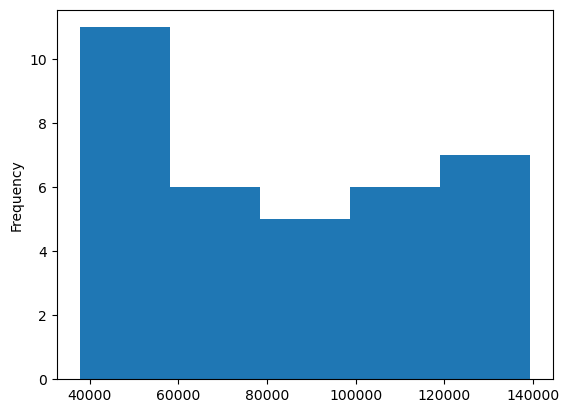

In [12]:
salaries.plot(kind='hist', bins=5)

In [27]:
ss.iqr(salaries)

np.float64(56204.5)

In [14]:
r, p = ss.pearsonr( data['exp'], data['salary'])

In [15]:
print(f"{r:.2f}, {p:.5f}")

0.98, 0.00000


<Axes: xlabel='exp', ylabel='salary'>

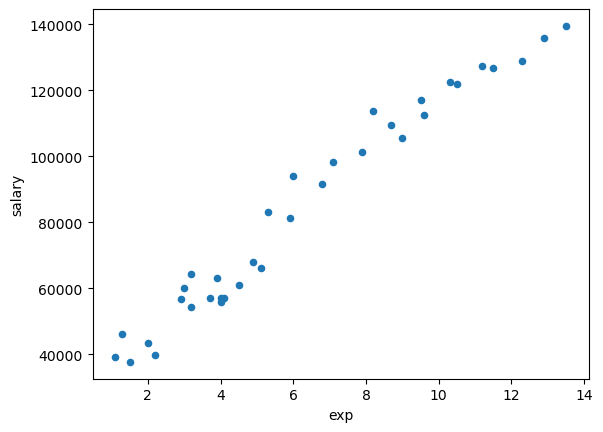

In [16]:
data.plot(x='exp', y='salary', kind='scatter')

In [17]:
lr = ss.linregress(years,salaries)

In [18]:
lr

LinregressResult(slope=np.float64(8731.941047062492), intercept=np.float64(28859.526194531478), rvalue=np.float64(0.9824272546479683), pvalue=np.float64(1.2309905889928102e-25), stderr=np.float64(288.78315746221443), intercept_stderr=np.float64(2092.7971310998655))

In [19]:
exp = [2,8,6,5,4]
pre_sals = []
for x in exp:
   pre_sals.append( lr.intercept + lr.slope * x)

In [20]:
pre_sals

[np.float64(46323.40828865646),
 np.float64(98715.05457103142),
 np.float64(81251.17247690642),
 np.float64(72519.23142984393),
 np.float64(63787.290382781444)]

### Compare actual with expected

In [21]:
exp_sals = []
for x in years:
   exp_sals.append(lr.intercept +  lr.slope * x)

In [22]:
exp_sals

[np.float64(38464.66134630022),
 np.float64(40211.049555712714),
 np.float64(41957.437765125214),
 np.float64(46323.40828865646),
 np.float64(48069.79649806896),
 np.float64(54182.1552310127),
 np.float64(55055.34933571895),
 np.float64(56801.73754513145),
 np.float64(56801.73754513145),
 np.float64(61167.7080686627),
 np.float64(62914.096278075194),
 np.float64(63787.290382781444),
 np.float64(63787.290382781444),
 np.float64(64660.48448748769),
 np.float64(68153.26090631269),
 np.float64(71646.03732513769),
 np.float64(73392.42553455019),
 np.float64(75138.81374396267),
 np.float64(80377.97837220019),
 np.float64(81251.17247690642),
 np.float64(88236.72531455642),
 np.float64(90856.30762867516),
 np.float64(97841.86046632516),
 np.float64(100461.4427804439),
 np.float64(104827.41330397516),
 np.float64(107446.9956180939),
 np.float64(111812.96614162516),
 np.float64(112686.16024633139),
 np.float64(118798.51897927513),
 np.float64(120544.90718868765),
 np.float64(126657.26592163139),

In [23]:
salaries

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: salary, dtype: int64

In [24]:
ds = pd.DataFrame( {'years' : years, 'exp_sals' : exp_sals})

In [25]:
ds.head()

,years,exp_sals
0,1.1,38464.661346
1,1.3,40211.049556
2,1.5,41957.437765
3,2.0,46323.408289
4,2.2,48069.796498


<Axes: xlabel='exp', ylabel='salary'>

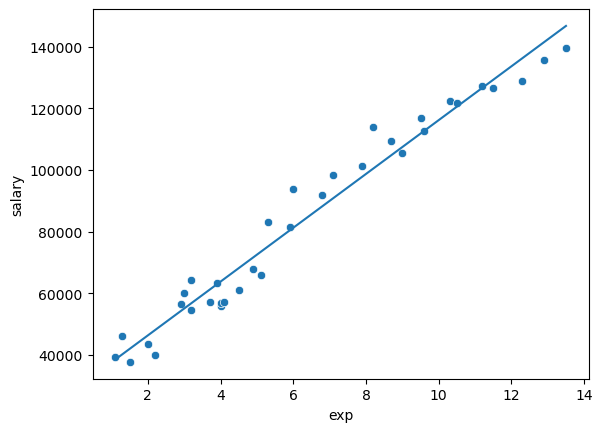

In [26]:
# Compare exp with actual 
sb.scatterplot(x='exp', y='salary', data = data)
sb.lineplot(x='years', y='exp_sals',data= ds)

In [28]:
# Find out diff between actual and exp_salary for each experience 